In [1]:
from igraph import *
from tqdm.notebook import tqdm
from math import sqrt
import networkx as nx
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def metric(g, part, n, m):
    if len(part) == 0 or len(part) == n:
        return 0
    E_in = 0
    E_out = 0
    for i in range(n):
        if i not in part:
            for j not in range(n):
                if g[i,j]:
                    if j in part:
                        E_in += 1
                    else:
                        E_out += 1
    x = E_in/(2*m) # 2* number of internal edges / 2 * total edges
    y = (E_in + E_out)/(2*m) # 2* internal + external / 2*total edges
#     print(x, y, part, n)
    if y == 1:
        print(part, n, m, x)
        Print(g)
    if (x - y**2)/sqrt((1 - y**2)*y**2) < 0:
        return 0
    return (x - y**2)/sqrt((1 - y**2)*y**2)

In [3]:
def graph_metric(g, part, n, m):
    total = 0
    for partt in part:
        total += metric(g, partt, n, m)
    return total

In [4]:
def next_small(g, taken, n):
    cnt = n
    idx = 0
    for i in range(n):
        if i not in taken:
            temp = 0
            for j in range(n):
                if j not in taken and g[i,j]:
                    temp += 1
            if temp < cnt:
                cnt = temp
                idx = i
    return idx

In [5]:
def communitude(graph, n):
    m = 0
    total = 0
    for i in range(n):
        for j in range(i+1, n):
            if graph[i, j]:
                m += 1
    nodes_taken = []
    community = []
    while len(nodes_taken) < n:
        ans = []
        com = metric(graph, nodes_taken, n, m)
        part = []
        temp = deepcopy(nodes_taken)
        while len(temp) < n:
            node = next_small(graph, temp, n)
            temp.append(node)
            part.append(node)
            check = metric(graph, temp, n, m)
            if check > com:
                com = check
                ans = deepcopy(part)
        total += com
        com = [x for x in range(n) if x not in ans and x not in nodes_taken]
        community.append(com)
        for node in com:
            nodes_taken.append(node)
    return community

In [6]:
def Print(g,num_nodes):
  G = nx.Graph()
  for i in range(num_nodes):
    G.add_node(i)
  for i in range(num_nodes):
    for j in range(i+1, num_nodes):
      if g[i,j] == 1:
        G.add_edge(i,j)
  nx.draw_networkx(G, with_labels=True, pos=nx.spring_layout(G))

In [7]:
def hub_node(clq1, clq2, alpha, beta):
    num_nodes = 1 + clq1 + clq2
    g = Graph.Full(num_nodes)
    for i in range(1,clq1+1):
        for j in range(clq1+1, num_nodes):
            g[i,j] = 0
    for i in range(1, clq1-alpha+1):
        g[0,i] = 0
    for i in range(1, clq2-beta+1):
        g[0, clq1+i] = 0
#     Print(g, num_nodes)
    return communitude(g, num_nodes)

In [8]:
def ring_cliques(size, num):
    num_nodes = num*size
    g = Graph.Full(num_nodes)
    for i in range(num):
        for j in range(size*i, size*(i+1)):
            for k in range(size*i): 
                g[j, k] = 0
            for k in range(size*(i+1), num_nodes):
                g[j,k] = 0
    for i in range(num-1):
        g[size*i, size*(i+1)+1] = 1
    g[1, num_nodes-1] = 1
#     Print(g, num_nodes)
    return communitude(g, num_nodes)

In [21]:
def clique_clique(x, y, w, z):
    num_nodes = w+x + w*(y+z)
    g = Graph.Full(num_nodes)
    for i in range(w):
        for j in range((w+x) + (y+z)*i, (w+x) + (y+z)*(i+1)):
            for k in range((w+x) + (y+z)*i):
                g[j,k] = 0
            for k in range((w+x) + (y+z)*(i+1), num_nodes):
                g[j,k] = 0
    for i in range(w):
        for j in range(z):
            g[i, (w+x)+(y+z)*i +j] = 1
    temp = communitude(g, num_nodes)
    val = graph_metric(g, temp, num_nodes, ((w+x)*(w+x-1)/2) + w*z + (w*(y+z)*(y+z-1)/2))
    
    part = []
    t = []
    for i in range(x+w):
        t.append(i)
    part.append(t)
    for i in range(w):
        t = []
        for j in range(y+z):
            t.append(j+(i*(y+z)) + (x+w))
        part.append(t)
    valc = graph_metric(g, part, num_nodes, ((w+x)*(w+x-1)/2) + w*z + (w*(y+z)*(y+z-1)/2))
    if val < valc:
        val = valc
        temp = part
    print("one", valc, part)
    
    part = []
    t = []
    for i in range(x):
        t.append(w+i)
    part.append(t)
    for i in range(w):
        t = [i]
        for j in range(y+z):
            t.append(j+(i*(y+z)) + (x+w))
        part.append(t)
    valc = graph_metric(g, part, num_nodes, ((w+x)*(w+x-1)/2) + w*z + (w*(y+z)*(y+z-1)/2))
    if val < valc:
        val = valc
        temp = part
    print("two", valc, part)
#     Print(g, num_nodes)
    return temp

## Ring of cliques

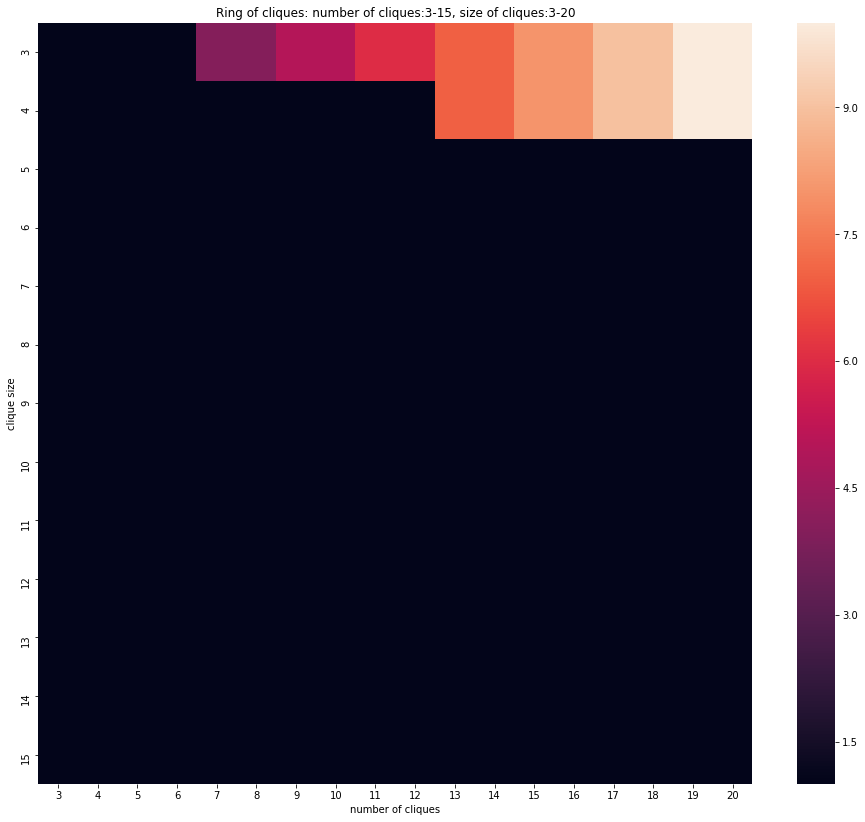

In [9]:
x_start = 3
y_start = 3
x_end = 16
y_end = 21
x_val = [i for i in range(x_start, x_end)]
y_val = [i for i in range(y_start, y_end)]
x_y = [(x,y) for x in range(x_start, x_end) for y in range(y_start, y_end)]
matrix_ans = []
check = []
for x in range(x_start, x_end):
    matrix_ans.append([0 for y in range(y_start, y_end)])
for z in tqdm(range(len(x_y))):
    temp = 0
    part = ring_cliques(x_y[z][0], x_y[z][1])
    if len(part) == x_y[z][1]:
        temp = 1
    else:
        temp = len(part)
        check.append([x_y[z], part])
    matrix_ans[z//(y_end - y_start)][z%(y_end - y_start)] = temp
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("number of cliques")
plt.title("Ring of cliques: number of cliques:3-15, size of cliques:3-20") 
plt.ylabel("clique size")
plt.savefig('Communitude:RingOfCliques.png')
plt.show()

## Hub Node

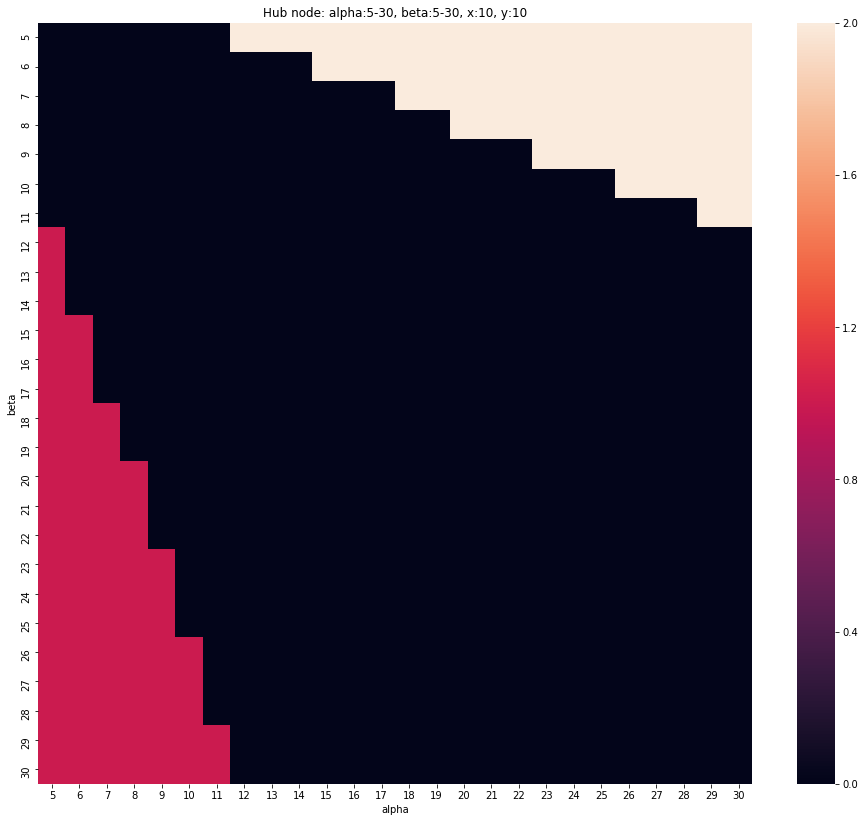

In [10]:
x_start = 5
y_start = 5
x_end = 31
y_end = 31
x_val = [i for i in range(x_start, x_end)]
y_val = [i for i in range(y_start, y_end)]
x_y = [(x,y) for x in range(x_start, x_end) for y in range(y_start, y_end)]
matrix_ans = []
for x in range(x_start, x_end):
    matrix_ans.append([0 for y in range(y_start, y_end)])
for z in tqdm(range(len(x_y))):
    temp = 0
    part = hub_node(x_y[z][0] + 10, x_y[z][1] + 10, x_y[z][0], x_y[z][1])
    if len(part) == 3:
        temp = 0
    elif len(part) == 2:
        if (0 in part[0] and 1 in part[0]) or (0 in part[1] and 1 in part[1]):
            temp = 1
        else:
            temp = 2
    else:
        temp = 3
#     print(z, x_y)
    matrix_ans[z//(y_end - y_start)][z%(y_end - y_start)] = temp
# print(matrix_ans)
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=x_val, yticklabels=y_val)
plt.title("Hub node: alpha:5-30, beta:5-30, x:10, y:10")
plt.xlabel("alpha")
plt.ylabel("beta")
plt.savefig('Communitude:HubNodeConstXY.png')
plt.show()
plt.savefig(f'1.png', bbox_inches='tight')

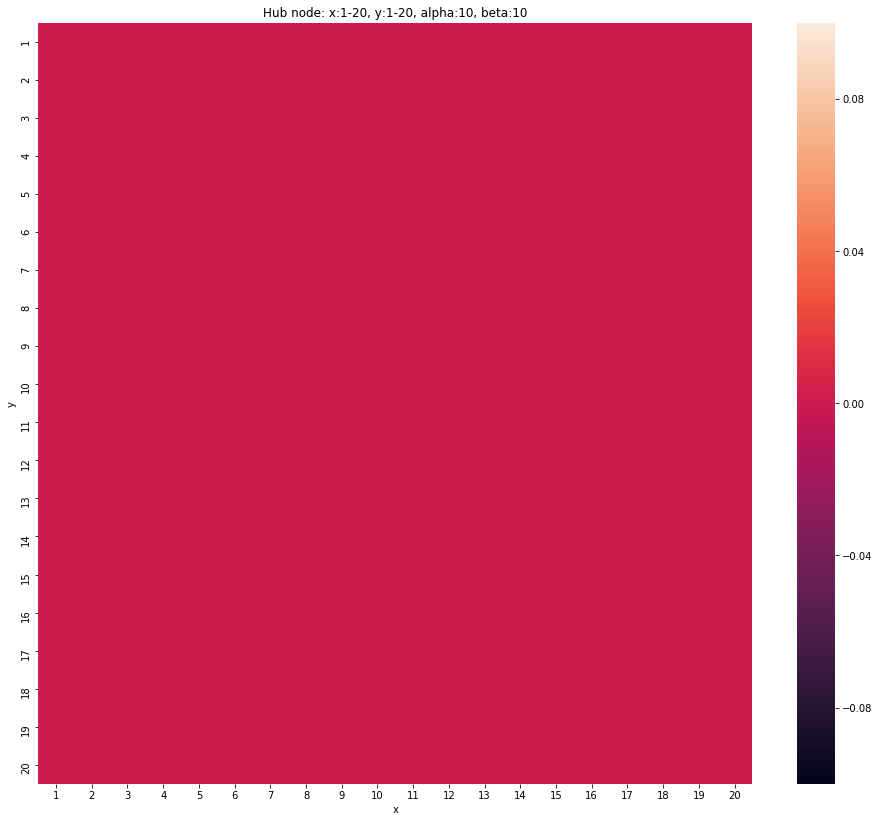

In [11]:
x_start = 1
y_start = 1
x_end = 21
y_end = 21
x_val = [i for i in range(x_start, x_end)]
y_val = [i for i in range(y_start, y_end)]
x_y = [(x,y) for x in range(x_start, x_end) for y in range(y_start, y_end)]
matrix_ans = []
for x in range(x_start, x_end):
    matrix_ans.append([0 for y in range(y_start, y_end)])
for z in tqdm(range(len(x_y))):
    temp = 0
    part = hub_node(x_y[z][0] + 10, x_y[z][1] + 10, 10, 10)
    if len(part) == 3:
        temp = 0
    elif len(part) == 2:
        if (0 in part[0] and 1 in part[0]) or (0 in part[1] and 1 in part[1]):
            temp = 1
        else:
            temp = 2
    else:
        temp = 3
#     print(z, x_y)
    matrix_ans[z//(y_end - y_start)][z%(y_end - y_start)] = temp
# print(matrix_ans)
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=x_val, yticklabels=y_val)
plt.title("Hub node: x:1-20, y:1-20, alpha:10, beta:10")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('Communitude:HubNodeConstAlphaBeta.png')
plt.show()

## Community(clique) surrounded by communites(cliques)

In [ ]:
x_start = 5
y_start = 5
x_end = 31
y_end = 31
# y is the right clique
x_val = [i for i in range(x_start, x_end)]
y_val = [i for i in range(y_start, y_end)]
x_y = [(x,y) for x in range(x_start, x_end) for y in range(y_start, y_end)]
matrix_ans = []
for x in range(x_start, x_end):
    matrix_ans.append([0 for y in range(y_start, y_end)])
for z in tqdm(range(len(x_y))):
    temp = 0
    part = clique_clique(10, 10, x_y[z][0], x_y[z][1])
    if len(part) == x_y[z][0] + 1:
        check = [i for i in range(10+x_y[z][0])]
        if check in part:
            temp = 0
        else:
            temp = 1
#             print(10, 10, x_y[z][0], x_y[z][1])
    else:
        temp = len(part)
#         print(10, 10, x_y[z][0], x_y[z][1])
#     print(z, x_y)
    matrix_ans[z//(y_end - y_start)][z%(y_end - y_start)] = temp
# print(matrix_ans)
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=y_val, yticklabels=x_val)
plt.xlabel("right clique size")
plt.ylabel("left clique size")
plt.title("Community  surrounded by community: x:10, y:10, alpha:5-30, beta:5-30")
plt.savefig('Communitude:CliqueCliqueConstXY.png')
plt.show()

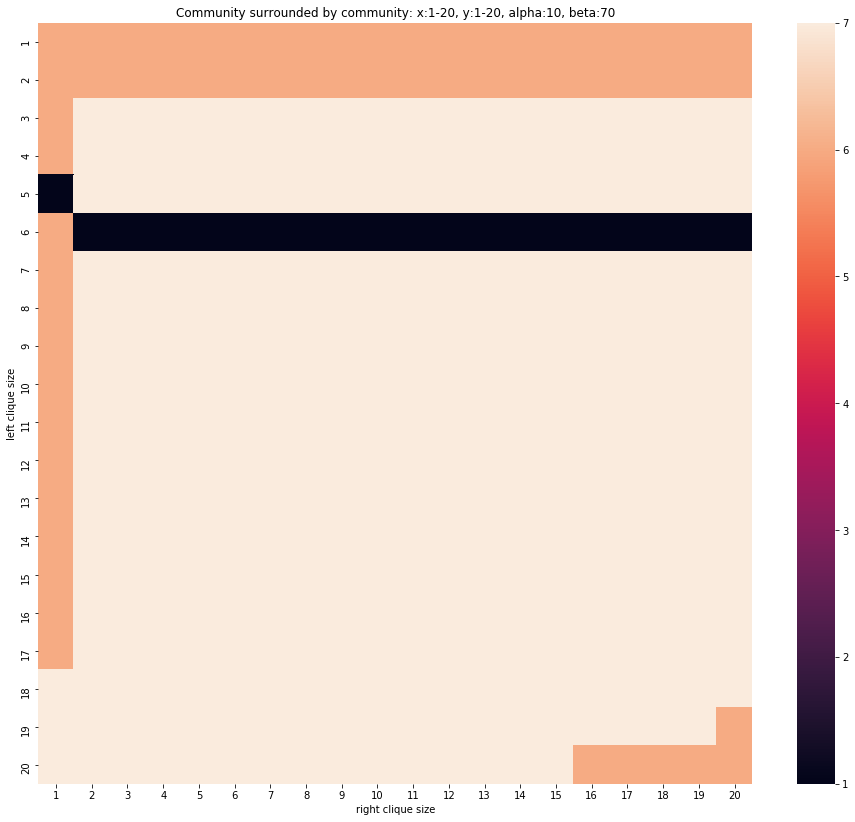

In [16]:
x_start = 1
y_start = 1
x_end = 21
y_end = 21
x_val = [i for i in range(x_start, x_end)]
y_val = [i for i in range(y_start, y_end)]
x_y = [(x,y) for x in range(x_start, x_end) for y in range(y_start, y_end)]
matrix_ans = []
for x in range(x_start, x_end):
    matrix_ans.append([0 for y in range(y_start, y_end)])
for z in tqdm(range(len(x_y))):
    temp = 0
    part = clique_clique(x_y[z][0], x_y[z][1], 5 , 27)
    if len(part) == x_y[z][0] + 1:
        check = [i for i in range(10+x_y[z][0])]
        if check in part:
            temp = 0
        else:
            temp = 1
    else:
        temp = len(part)
    matrix_ans[z//(y_end - y_start)][z%(y_end - y_start)] = temp
# print(matrix_ans)
plt.figure(figsize = (16,14))
sns.heatmap(matrix_ans,xticklabels=x_val, yticklabels=y_val)
plt.xlabel("right clique size")
plt.ylabel("left clique size")
plt.title("Community surrounded by community: x:1-20, y:1-20, alpha:10, beta:70")
plt.savefig('Communitude:CliqueCliqueConstAlphaBeta.png')
plt.show()

In [ ]:
# x_val = [i for i in range(2,30)]
# y_val = [i for i in range(2,30)]
# matrix_ans = []
# for i in tqdm(x_val):
#     temp = []
#     for j in y_val:
#         part = ring_cliques(i, j)
# #         print(i, part)
#         if(len(part) == i):
#             temp.append(2)
#         elif(len(part) == 1):
#             temp.append(0)
#         else:
#             temp.append(1)
#     matrix_ans.append(temp)
    
# plt.figure(figsize = (16,14))
# sns.heatmap(matrix_ans,xticklabels=x_val, yticklabels=y_val)
# plt.xlabel("clique size")
# plt.ylabel("number of cliques")
# plt.show()

In [18]:
print(clique_clique(6, 5, 5, 27))

one 1.6354133983018988 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42], [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74], [75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], [107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138], [139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]]
two 1.6738483757794598 [[5, 6, 7, 8, 9, 10], [0, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42], [1, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5

In [19]:
print(clique_clique(5, 6, 5, 27))

one 1.6327061491537407 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42], [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75], [76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108], [109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141], [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]]
two 1.6704657405830734 [[5, 6, 7, 8, 9], [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42], [1, 43, 44, 45, 46, 4

In [22]:
print(clique_clique(10, 5, 5, 27))

one 4.548145304785289 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], [79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], [111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142], [143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174]]
two 4.65440469714432 [[5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [1, 47, 

In [23]:
print(clique_clique(5, 10, 5, 27))

one 4.376682754801604 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], [47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83], [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157], [158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194]]
two 4.493065826764416 [[5, 6, 7, 8, 9], [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 